# Model

In [15]:
import pandas as pd
import joblib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.inspection import permutation_importance

from churn_classification_engine.config import settings

In [25]:
MODEL_PATH = ".." / settings.models_dir / "calibrated_hist_gradient_boosting.pkl"
TEST_DATA_PATH  = ".." / settings.data_dir / "test.csv"

In [26]:
test_df = pd.read_csv(TEST_DATA_PATH, index_col="CUSTOMER_ID")
model = joblib.load(MODEL_PATH)

In [27]:
X_test = test_df.drop(columns=["CHURN", "COUNTRY_CODE"])
y_test = test_df["CHURN"]

In [28]:
model

CalibratedClassifierCV(estimator=FrozenEstimator(estimator=Pipeline(steps=[('tablevectorizer',
                                                                            TableVectorizer(low_cardinality=ToCategorical())),
                                                                           ('histgradientboostingclassifier',
                                                                            HistGradientBoostingClassifier(class_weight='balanced',
                                                                                                           learning_rate=0.03239405091048051,
                                                                                                           max_bins=155,
                                                                                                           max_depth=5,
                                                                                                           max_iter=108,
                                                                                                           min_samples_leaf=48,
                                                                                                           random_state=42))])))

In [32]:
(((model.predict_proba(X_test)[:, 1])>=.3)==y_test).mean()

np.float64(0.7898454947358826)

In [29]:
result = permutation_importance(
    model, X_test, y_test, n_repeats=10, random_state=42
)

sorted_importances_idx = result.importances_mean.argsort()

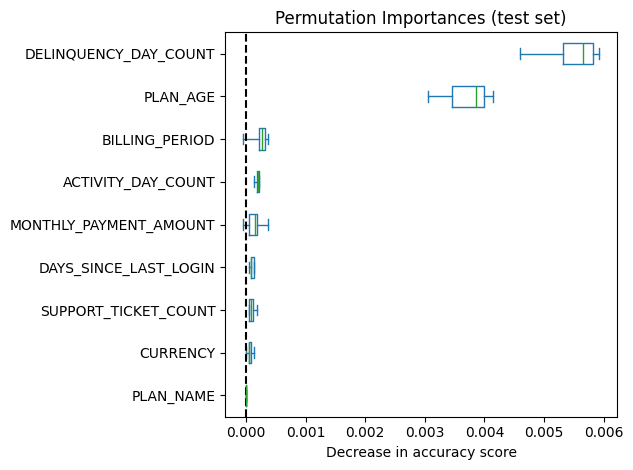

In [30]:
importances = pd.DataFrame(
    result.importances[sorted_importances_idx].T,
    columns=X_test.columns[sorted_importances_idx],
)
ax = importances.plot.box(vert=False, whis=10)
ax.set_title("Permutation Importances (test set)")
ax.axvline(x=0, color="k", linestyle="--")
ax.set_xlabel("Decrease in accuracy score")
ax.figure.tight_layout()